In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

# Question 1 

For this question, you only need to do programming for Part 1.1 - 1.6. You will only be asked to provide answers in Part 1.7. 

In [2]:
PATH_TO_Q1_DATA = 'data/HW3_Q1_DATA.csv'
df_original = pd.read_csv(PATH_TO_Q1_DATA)

### Data Exploration

In [3]:
df_original.shape

(121913, 19)

In [4]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121913 entries, 0 to 121912
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Sex                            121913 non-null  object
 1   Intubated                      121789 non-null  object
 2   Pneumonia                      121912 non-null  object
 3   Age                            121913 non-null  int64 
 4   Pregnant                       48676 non-null   object
 5   Diabetes                       121244 non-null  object
 6   COPD                           121329 non-null  object
 7   Asthma                         121328 non-null  object
 8   Immunocompromised              121233 non-null  object
 9   Hypertension                   121304 non-null  object
 10  Other_Disease                  120872 non-null  object
 11  Cardiovascular_disease         121267 non-null  object
 12  Obesity                        121279 non-nu

In [6]:
df_original['Died'].value_counts()

N    89357
Y    32556
Name: Died, dtype: int64

### Encode data

In [7]:
# convert categorical data to numerical values
# drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
df_encoded=pd.get_dummies(df_original, drop_first=True,dummy_na=True)
print(df_encoded.shape)

(121913, 38)


In [8]:
# def encode_data_1(df):
#     '''
#     Encodes categorical data after dropping records with missing values, then returns a DataFrame of the result.
#     '''
    
#     # drop records with missing values
#     df=df_original.dropna()
#     print(df.shape)
    
#     # convert categorical data to numerical values
#     # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
#     df=pd.get_dummies(df, drop_first=True)
#     print(df.shape)

#     return df

In [9]:
# df_encoding1 = encode_data_1(df_original)

In [10]:
df_encoded.head()

,Age,Sex_M,Sex_nan,Intubated_Y,Intubated_nan,Pneumonia_Y,Pneumonia_nan,Pregnant_Y,Pregnant_nan,Diabetes_Y,...,Smoker_nan,Exposure_to_others_with_COVID_Y,Exposure_to_others_with_COVID_nan,Has_COVID_Pending,Has_COVID_Y,Has_COVID_nan,ICU_Y,ICU_nan,Died_Y,Died_nan
0,54,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,30,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,60,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,47,1,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,1,0,1,0
4,63,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [11]:
df_encoded.drop('Age',axis='columns').sum(axis='rows')

Sex_M                                73071
Sex_nan                                  0
Intubated_Y                           9965
Intubated_nan                          124
Pneumonia_Y                          73747
Pneumonia_nan                            1
Pregnant_Y                            1071
Pregnant_nan                         73237
Diabetes_Y                           35481
Diabetes_nan                           669
COPD_Y                                5493
COPD_nan                               584
Asthma_Y                              3144
Asthma_nan                             585
Immunocompromised_Y                   4726
Immunocompromised_nan                  680
Hypertension_Y                       40344
Hypertension_nan                       609
Other_Disease_Y                       7287
Other_Disease_nan                     1041
Cardiovascular_disease_Y              6305
Cardiovascular_disease_nan             646
Obesity_Y                            25127
Obesity_nan

### Visualize Data

In [12]:
# plot data so I can see what shape it takes
y = df_encoded['Died_Y']
print(y.shape)
X = df_encoded.drop('Died_Y',axis='columns')
print(X.shape)

(121913,)
(121913, 37)


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

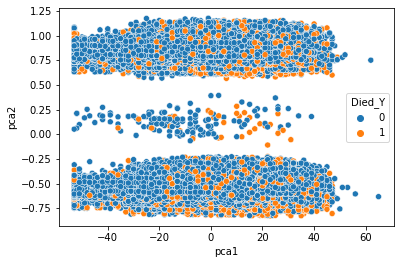

In [13]:
from sklearn.decomposition import PCA

# use PCA to visualize data
pca = PCA(n_components=2).fit_transform(df_encoded.drop('Died_Y',axis='columns')) 
df_pca_plot = pd.DataFrame(pca, columns=['pca1','pca2'])
df_pca_plot_concat = df_pca_plot.assign(Died_Y=y.values)
sns.scatterplot(x='pca1', y='pca2', data=df_pca_plot_concat, legend='full',hue='Died_Y')

## Define Methods for Capturing Classifier Metrics

### Methods to Calculate Metrics

In [32]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(clf,X,y):
    '''
    Calculates the confusion matrix for a given X,y and classifier.
    '''
    y_predict = clf.predict(X)
    y_true = y
   
    # confusion matrix
    return confusion_matrix(y_true, y_predict)


def y_score_from_decision_function(clf,X):
    '''
    Uses decision_function to calculate y_score because classifier doesn't have predict_prob().
    '''
    return clf.decision_function(X)
    

def y_score_from_predict_proba(clf,X):
    '''
    Uses predict_proba to calculate y_score.
    '''
    return clf.predict_proba(X)[:,1]

In [33]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def calc_classifier_metrics(cm, y_true, y_predict, y_score):
    
    tn, fp, fn, tp = cm.ravel()
    
    # accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # positive predictive value
    ppv = tp / (fp + tp) # ?? check correctness
    
    # negative predictive value
    npv = tn / (fn + tn) # ?? check correctness
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen)  # ?? check correctness
    
    # matthew correlation coefficient
    mcc = matthews_corrcoef(y_true,y_predict)
    
    # area under the receiver (AUC)
    auc = roc_auc_score(y_true, y_score)
    
    # return numpy array  
    return [acc,sen,spec,ppv,npv,f1,mcc,auc]

### Methods to Store Metrics

In [39]:
def add_row(df, section, description, metrics):
    
    data = [section,description] + metrics 
    new_row = pd.Series(data, index = df.columns)
    return df.append(new_row,ignore_index=True)


def add_metrics_to_table(df, section, description, clf, X, y, y_score):
    
    # for validation purposes
    print(clf.score(X,y),'\n')
    
    # calculate confusion matrix
    cm = get_confusion_matrix(clf,X,y)
    
    # calculate metrics
    y_predict = clf.predict(X)
    metrics = calc_classifier_metrics(cm,y,y_predict,y_score)
    
    # add row to results DataFrame
    return add_row(df, section, description, metrics)

### DataFrame to store classifier metric results for all tests

In [35]:
# dataframe to collect results of all tests
df_results = pd.DataFrame(
    columns=['Section',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Section':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

In [31]:
df_results.head()

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC


## Part 1.1 Select features and train classifiers

### Part 1.1 Work 

In [15]:
# TODO: 
#   Step 1: Select and apply a filter-based or wrapper-based feature selection method to the data.
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. You may find the filter-based or wrapper-based methods you used in HW2 useful. 

#   2. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   3. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define functions

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


def run_crossfold_recursive_feature_elimination(X,y):
    clf = DecisionTreeClassifier()
    rfecv = RFECV(estimator=clf, step=1, cv=10,scoring='neg_mean_squared_error',n_jobs=3)
    return rfecv.fit(X, y)


def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i])      
    return features


def build_X_from_features(X, features):
    return X.loc[:][features]


def train_random_forest_classifier(X,y):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    return clf.fit(X,y)
      

def run_classifier_with_cross_validation(X,y,k):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    scores = cross_val_score(clf, X, y, cv=k)
    return scores.mean()  

#### 

In [22]:
# select data
X_1_1 = df_encoded.drop(['Died_Y','Died_nan'],axis='columns')
y_1_1 = df_encoded.loc[:]['Died_Y']
print(X_1_1.shape)
print(y_1_1.shape)

(121913, 36)
(121913,)


In [18]:
%%time

# select features
rfe_1_1 = run_crossfold_recursive_feature_elimination(X_1_1,y_1_1)
features_1_1 = get_feature_list(X_1_1,rfe_1_1.support_)

CPU times: user 8.92 s, sys: 212 ms, total: 9.13 s
Wall time: 47.8 s


In [19]:
features_1_1

['Age',
 'Intubated_Y',
 'Pneumonia_Y',
 'Exposure_to_others_with_COVID_nan',
 'Has_COVID_Y']

In [38]:
%%time

# limit features to those selected by previous step
X_1_1_select = build_X_from_features(X_1_1,features_1_1)
print(X_1_1_select.shape)

# score classifier using 10-fold cross validation
score = run_classifier_with_cross_validation(X_1_1_select,y_1_1,10)
print("Accuracy:",score)

(121913, 5)
Accuracy: 0.7482713242213663
CPU times: user 14.8 s, sys: 140 ms, total: 14.9 s
Wall time: 15 s


In [40]:
%%time

# run classifier on full dataset to capture metrics
clf_1_1 = train_random_forest_classifier(X_1_1_select,y_1_1)

CPU times: user 1.62 s, sys: 19.2 ms, total: 1.64 s
Wall time: 1.65 s


In [41]:
# capture metrics for later use
y_score_1_1 = y_score_from_predict_proba(clf_1_1,X_1_1_select)
df_results = add_metrics_to_table(df_results,1,"Wrapper",clf_1_1,X_1_1_select,y_1_1,y_score_1_1)
df_results

0.7482220928038847 



,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.748222,0.090367,0.987902,0.731295,0.7488,0.165588,0.193848,0.755638


#### Define wrapper-based feature selection method and classifier
DecisionTree reference: https://www.dezyre.com/recipes/do-recursive-feature-elimination-in-python-decisiontreeregressor

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

# # version 1 takes a long time
# def perform_feature_selection_wrapper(X,y):
#     svc = SVC(kernel="linear")
#     rfecv = RFECV(estimator=svc, step=1, cv=5,scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# # version 2 takes too long
# def perform_feature_selection_wrapper_2(X,y):
#     svc = SVC(gamma=2, C=1)
#     rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# version 3 is fast
def perform_feature_selection_wrapper_3(X,y):
    dtree = DecisionTreeClassifier(random_state=0)
    rfecv = RFECV(estimator=dtree, step=1, cv=10,scoring='neg_mean_squared_error',n_jobs=3)
    return rfecv.fit(X, y)
  
def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i]) # feature was selected by wrapper method
        
    return features

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def build_X_from_features(X, list_features):
    return X.loc[:][list_features]

def train_classifier(X,y,k):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k)
    return clf.fit(X, y)

# def train_classifier_3(X,y,k):
#     clf = SVC(gamma=2, C=1)
#     scores = cross_validate(clf, X, y, cv=k,return_estimator=True)
#     return scores

#### Separate encoded data into features and target

In [ ]:
y_1_1 = df_encoding1.loc[:]['Died_Y']
print(y_1_1.shape)
X_1_1 = df_encoding1.drop('Died_Y',axis='columns')
print(X_1_1.shape)

In [ ]:
X_1_1.info()

#### Perform feature selection and classification

In [ ]:
# %%time 
# # runtime - 3.4 s (1000 records, 10 fold, 3 cores)
# # runtime - 6 min (10000 records, 10 fold, 3 cores)
# # runtime - 6 min (23158 records, 10 fold, 3 cores)

# # feature selection
# rfecv = perform_feature_selection_wrapper(X_1_1,y_1_1)
# features_wrapper = get_feature_list(X_1_1,rfecv.support_)

In [ ]:
# features_wrapper

In [ ]:
%%time

# runtime - 1s (23158 records, 10 fold, 3 cores)

rfecv3 = perform_feature_selection_wrapper_3(X_1_1,y_1_1)
features_wrapper3 = get_feature_list(X_1_1,rfecv3.support_)

In [ ]:
features_wrapper3

In [ ]:
%%time

# classification
X_1_1_classifier = build_X_from_features(X_1_1,features_wrapper3)
clf_1_1 = train_classifier(X_1_1_classifier,y_1_1,10)

#### Calculate metrics and add row to results DataFrame
- Accuracy
- Sensitivity & Specificity
- The positive and negative predictive values 
- F1-score
- The Matthews Correlation Coefficient
- AUC (Area under the ROC curve)

In [ ]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true,y_predict):
    '''
    Calculates the confusion matrix for a given X,y and classifier.
    '''
    # confusion matrix
    cm = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = cm.ravel()
    
    return cm


def get_y_score_from_decision_function(X,clf):
    '''Uses decision_function to calculate y_scores because classifier doesn't have predict_prob().
    '''
    return clf.decision_function(X)

def get_y_score_from_predict_proba(X,clf):
    return clf.predict_proba(X)[:,1]


def get_y_score(X,y,clf,score_func):
    if score_func == "decision":
        return get_y_score_from_decision_function(X,clf)
    elif score_func == "proba":
        return get_y_score_from_predict_proba(X,clf)

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def calc_classifier_metrics(cm, y_true, y_predict, y_score):
    
    tn, fp, fn, tp = cm.ravel()
#     print('TN:',tn)
#     print('FP:',fp)
#     print('FN:',fn)
#     print('TP:',tp)
#     print('TOTAL:',tp + tn + fp + fn)
    
    # accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # positive predictive value
    ppv = tp / (fp + tp) # ?? check correctness
    
    # negative predictive value
    npv = tn / (fn + tn)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    # matthew correlation coefficient
    mcc = matthews_corrcoef(y_true,y_predict)
    
    # area Under the receiver (AUC)
    auc = roc_auc_score(y_true, y_score)
    
    # return numpy array  
    metrics = [acc,sen,spec,ppv,npv,f1,mcc,auc]
    return metrics

In [ ]:
def add_row(df, section, description, metrics):
    
    data = [section,description] + metrics 
    new_row = pd.Series(data, index = df.columns)
    return df.append(new_row,ignore_index=True)

def add_metrics_to_table(df, section, description, X, y, clf, score_func):
    
    # for validation purposes
#     print(clf.score(X,y),'\n')
    
    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)
    
    # calculate y score
    y_score = get_y_score(X,y,clf, score_func)
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict,y_score)
#     print('\n',metrics)
    
    # add row to results DataFrame
    return add_row(df, section, description, metrics)

In [ ]:
df_results = add_metrics_to_table(df_results, 1, "Wrapper", X_1_1_classifier, y_1_1, clf_1_1,"decision")

In [ ]:
df_results

### Part 1.2 Work 

In [ ]:
# TODO: 
#   Step 1: Select a learning algorithm that performs embedded feature selection. 
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   2. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define embedded feature selection method

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV

def perform_feature_selection_embedded(X,y):
    sel = SelectFromModel(RandomForestClassifier())
    return sel.fit(X, y)

#### Perform feature selection and classification

In [ ]:
from sklearn.model_selection import train_test_split

# use same data from 1.1
X_1_2 = X_1_1
y_1_2 = y_1_1

# split data
X_train_embedded,X_test_embedded,y_train_embedded,y_test_embedded = train_test_split(X_1_2,
                                                                                     y_1_2,
                                                                                     test_size=0.25)

In [ ]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded, y_train_embedded)
features_embedded = get_feature_list(X_train_embedded,rfc.get_support())

In [ ]:
features_embedded

In [ ]:
%%time

# classification
X_1_2_classifier = build_X_from_features(X_1_2,features_embedded)
clf_1_2 = train_classifier(X_1_2_classifier,y_1_2,10)

#### Calculate metrics and add row to results DataFrame

In [ ]:
df_results = add_metrics_to_table(df_results, 2, "Embedded", X_1_2_classifier, y_1_2, clf_1_2,"decision")

In [ ]:
df_results

### Part 1.3 Work 

In [ ]:
# TODO: 
#   Step 1: Select and apply a data imputation method to handle the missing data.
#   Step 2: Apply the  wrapper based feature selection method you used in part 1.1.
#   Step 3: Train a classifier using the selected features. Use the same classifier you used in part 1.1. Use 10-fold cross validation.

# Tip: 
#   1. Sciki-learn implements different imputation methods. Take a look at https://scikit-learn.org/stable/modules/impute.html
#   and use the one you think most appropriate.

#### Impute missing values

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")

In [ ]:
ndarray_imputed = imp.fit_transform(df_original)
ndarray_imputed.shape

In [ ]:
# convert back to DataFrame
df_imputed = pd.DataFrame(ndarray_imputed, columns=df_original.columns)
df_imputed.head()

In [ ]:
df_original.head()

In [ ]:
# convert Age to int64 data type so get_dummies() doesn't treat it as a category
df_imputed = df_imputed.astype({'Age': 'int64'})

In [ ]:
df_imputed.info()

#### Convert categorical data to numerical

In [ ]:
def encode_data_2(df):
    '''
    Encodes categorical data then returns a DataFrame of the result.
    '''
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)

    return df

In [ ]:
df_imputed_encoded = encode_data_2(df_imputed)
df_imputed_encoded.shape

In [ ]:
df_imputed_encoded.head()

In [ ]:
# separate into features and target 
X_1_3 = df_imputed_encoded.drop('Died_Y', axis='columns')
y_1_3 = df_imputed_encoded['Died_Y']
print(X_1_3.shape)
print(y_1_3.shape)

#### Apply wrapper based feature selection

In [ ]:
%%time 
# runtime - 23 min (30000 records, 10 fold, 3 cores) with perform_feature_selection_wrapper_1
# runtime - 13 s (120k records, 10 fold, 3 cores) with perform_feature_selection_wrapper_3

# feature selection
rfecv_imputed = perform_feature_selection_wrapper_3(X_1_3,y_1_3)
features_wrapper_imputed = get_feature_list(X_1_3,rfecv_imputed.support_)

In [ ]:
features_wrapper_imputed

#### Train classifier

In [ ]:
%%time

# classification
X_1_3_classifier = build_X_from_features(X_1_3,features_wrapper_imputed)
clf_1_3 = train_classifier(X_1_3_classifier,y_1_3,10)

#### Add classifier metrics to results DataFrame

In [ ]:
df_results = add_metrics_to_table(df_results, 3, "Wrapper Imputed", X_1_3_classifier, y_1_3, clf_1_3,"decision")

In [ ]:
df_results

### Part 1.4 Work 

In [ ]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in part 1.3. 
#   Step 2: Train a classifier. Use the same classifier you used in part 1.2. Use 10-fold cross validation.

#### Perform feature selection and classification

In [ ]:
# use the same imputed data as in 1.3
X_1_4=X_1_3
y_1_4=y_1_3

# split data
X_train_embedded_i,X_test_embedded_i,y_train_embedded_i,y_test_embedded_i = train_test_split(
    X_1_4,
    y_1_4,
    test_size=0.25)

In [ ]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded_i, y_train_embedded_i)
features_embedded_imputed = get_feature_list(X_1_4,rfc.get_support())

In [ ]:
features_embedded_imputed

In [ ]:
%%time

# classification
X_1_4_classifier = build_X_from_features(X_1_4,features_embedded_imputed)
clf_1_4 = train_classifier(X_1_4_classifier,y_1_4,10)

#### Calculate metrics and add row to results DataFrame

In [ ]:
df_results = add_metrics_to_table(df_results, 4,"Embedded Imputed",X_1_4_classifier,y_1_4,clf_1_4,"decision")

In [ ]:
df_results

### Part 1.5 Work 

In [ ]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in parts 1.3 & 1.4. 
#   Step 2: Select a learning algorithm that performs cost-sensitive learning. 
#   Step 3: Adjust the costs until you find a classifier that maximizes the F1-score, subject to the constraint that it achieves 95% sensitivity for the label ‘Y’.  Use 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

#### Apply same data imputation method

In [ ]:
# use the same imputed data as in 1.3
X_1_5 = X_1_4
y_1_5 = y_1_4

In [ ]:
# check label counts to see imbalance
y_1_5.value_counts()

#### Feature Selection?

In [ ]:
##?? are we performing feature selection here
X_1_5_classifier = X_1_5

#### Find correct weights for cost-sensitive classifier

In [ ]:
def train_cost_sensitive_classifier(X,y,k,weights):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k, class_weight=weights)
    return clf.fit(X, y)

In [ ]:
def calc_sensitivity_and_f1(cm):
    
    tn, fp, fn, tp = cm.ravel()
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    return (sen,f1)

In [ ]:
def run_balanced_case(X,y):
    # base case
    clf = train_cost_sensitive_classifier(X,y,10,'balanced')

    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate metrics
    sen,f1 = calc_sensitivity_and_f1(cm)
    print('\nSensitivity:',sen)
    print('F-score:',f1)
    
run_balanced_case(X_1_5_classifier,y_1_5)

In [ ]:
# after zero weight of 0.2, results degraded rapidly
def find_zero_weight_to_maximize_f1(X,y):
    
    zero_weight=0.0
    max_f1=0.0
    zero_weight_for_max=0.0
    while zero_weight < 0.2:
        zero_weight = round(zero_weight + 0.005,3)
        one_weight = round(1 - zero_weight,3)
        
        print(zero_weight,one_weight)
        clf = train_cost_sensitive_classifier(X,y,10,{0:zero_weight, 1:one_weight})

        # calculate confusion matrix
        y_predict = clf.predict(X)
        y_real = y
        cm = get_confusion_matrix(y_real,y_predict)

        # calculate metrics
        sen,f1 = calc_sensitivity_and_f1(cm)
        if sen >= 0.95 and f1 > max_f1:
            max_f1 = f1
            zero_weight_for_max=zero_weight
            
    print('max_f1:',max_f1)
    print('zero_weight for max_f1:',zero_weight_for_max)
    return zero_weight_for_max

In [ ]:
%%time

best_zero = find_zero_weight_to_maximize_f1(X_1_5_classifier,y_1_5)
best_one = round(1-best_zero,3)
print()
print(best_zero)
print(best_one)

In [ ]:
# run classifier using best weights
weights = {0:best_zero, 1:best_one}
clf_1_5 = train_cost_sensitive_classifier(X_1_5_classifier,y_1_5,10,weights)

#### Calculate metrics for best classifier and add row to results DataFrame

In [ ]:
df_results = add_metrics_to_table(df_results,5,"Cost Sensitive Imputed",X_1_5_classifier,y_1_5,clf_1_5,"decision")

In [ ]:
df_results

### Part 1.6 Work 

In [ ]:
# TODO: 
#   Step 1: Implement a function calculating the weighted average F1-score, following 
#       the steps in the homework problem statement.
#   Step 2: Find a classifier that achieves a weighted average F1-score of at least 0.74 using 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/



#### Define Weighted F1 function

In [ ]:
def weighted_f1(cm):
    '''
    Calculates a weighted F1-score using given confusion matrix cm. 
    '''
    
    tn, fp, fn, tp = cm.ravel()
    
    # F1 score computed using label 'Y' as true positive ??
    F_1_Y = tp / (tp + 0.5 * (fp + fn))
    
    # F1 score computed using label 'N' as true negative ??
    F_1_N = tn / (tn + 0.5 * (fp + fn))
    
    # number of instances with label 'Y'
    n_Y = tp + fp
    
    # number of instances with label 'N'
    n_N = tn + fn
    
    
    # calculate weights
    a = n_Y / (n_Y + n_N) #?? check on this
    
    b = n_N / (n_Y + n_N) #?? check on this
    
    
    # calculated weighted f1
    f1_weighted = (a * F_1_Y) + (b * F_1_N) #?? check on this
    
    return f1_weighted

#### Exploration studies

##### Test Round 1

Initial classifiers I explored, along with Weighted F1 score. 

- **0.64**  KNeighborsClassifier(2)
- **0.74**  SVC(kernel="linear", C=0.025)
- **0.72**  SVC(gamma=2, C=1)
- **N/A**  GaussianProcessClassifier(1.0 * RBF(1.0))
- **0.71**  DecisionTreeClassifier(max_depth=5)
- **0.71**  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
- **0.72**  MLPClassifier(alpha=1, max_iter=1000)
- **0.74**  AdaBoostClassifier():
- **0.78**  GaussianNB():
- **ERR**   QuadraticDiscriminantAnalysis()

These results used features from 1.3. The F1 scores go down when using all features. The results used a sample of 50k records from X_1_5, subdivided by test_train_split().

##### Test  Round 2

I further explored classifiers using features from 1.3 and the full dataset, subdivided by train_test_split().

- **0.78** KNeighborsClassifier(2)
- **0.80** SVC(kernel="linear",C=0.025)
- **0.79** SVC(gamma=2,C=1)
- **0.79** DecisionTreeClassifier(max_depth=5)
- **0.80** RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)
- **0.83** MLPClassifier(alpha=1,max_iter=1000)
- **0.80** AdaBoostClassifier()
- **0.80** GaussianNB()

##### Test Round 3

I choose to continue testing with DecisionTreeClassifier because it has an input for class weights for cost-sensitive learning. I performed a series of tests to determine the class weights for DecisionTreeClassifier which obtained the highest weighted F1 while also keeping in mind the sensitivity.

- Keeping sensitivity above 0.95, the model achieved a weighted F1 of 0.46 (class weights {0:2, 1:17}). 
- Keeping sensitivity above 0.60, the model achieved a weighted F1 of 0.65 (class weights {0:5, 1:16}).
- Keeping sensitivity above 0.40, the model achieved a weighted F1 of 0.66 (class weights {0:5, 1:16}).

##### Test Round 4

After selecting the weights, I ran cross-fold validation using the classifier. I failed to achieve a weighted F1 higher than 0.66 while manipulating the class weights. As soon as I restored the default weights, the F1 score rose above the 0.74 required threshold. 

##### Undersampling
I tried running classifier using an undersampled dataset. I couldn't get above 0.68 for weighted F1.

##### Oversampling
I tried running classifier using an oversampled dataset. I couldn't get above 0.69 for weighted F1.

##### Final Round
I returned to using the imputed data from 1.3, and the classifier I selected achieved over 0.74 weighted average F1-score.

#### Data Selection

In [ ]:
# data
X_1_6 = X_1_5
y_1_6 = y_1_5
print(X_1_6.shape)
print(y_1_6.shape)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # undersample the data
# rus = RandomUnderSampler(random_state=0)

# X_1_6, y_1_6 = rus.fit_resample(X_1_5, y_1_5)
# print(X_1_6.shape)
# print(y_1_6.shape)
# y_1_6.value_counts() # counts exactly match

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_1_6, y_1_6 = ros.fit_resample(X_1_5, y_1_5)
# print(X_1_6.shape)
# print(y_1_6.shape)
# y_1_6.value_counts() # counts exactly match

#### Feature Selection

In [ ]:
%%time 

rfecv_1_6 = perform_feature_selection_wrapper_3(X_1_6,y_1_6)
features_wrapper_1_6 = get_feature_list(X_1_6,rfecv_1_6.support_)

In [ ]:
features_wrapper_1_6

In [ ]:
X_1_6_classifier = build_X_from_features(X_1_6,features_wrapper_1_6)
X_1_6_classifier.shape

#### Classifier Exploration
Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


X_train_1_6, X_test_1_6, y_train_1_6, y_test_1_6 = train_test_split(X_1_6_classifier,
                                                                    y_1_6,
                                                                    test_size=.4,
                                                                    random_state=42)
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

for i, clf in enumerate(classifiers):
    clf.fit(X_train_1_6, y_train_1_6)
        
    # calculate confusion matrix
    y_predict = clf.predict(X_test_1_6)
    y_real = y_test_1_6
    cm = get_confusion_matrix(y_real,y_predict)
    
    print("Weighted F1:",weighted_f1(cm))

#### Cross-Fold Validation with Chosen Classifier

In [ ]:
# create dataframe to store test results of each fold
df_folds = pd.DataFrame(
    columns=['Section',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Section':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

In [ ]:
%%time

# 12 min runtime for RBF SVC

from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

# define classifier
clf_1_6 = AdaBoostClassifier()

# define list for weighted f1 scores
weighted_f1_scores = list()

# run 10 fold cross validation
kf=KFold(n_splits=10, shuffle=True)
for k, (train, test) in enumerate(kf.split(X_1_6_classifier, y_1_6)):

    # get training rows for this fold
    X_train = X_1_6_classifier.iloc[train]
    y_train = y_1_6.iloc[train]
    X_test = X_1_6_classifier.iloc[test]
    y_test = y_1_6.iloc[test]

    # train classifier
    clf_1_6.fit(X_train,y_train)

    # calculate confusion matrix
    y_predict = clf_1_6.predict(X_test)
    y_real = y_test
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate weighted-f1 and other metrics
    w_f1 = weighted_f1(cm)
    weighted_f1_scores.append(w_f1)
    
    # calculate y score
    y_score = get_y_score(X_test,y_test,clf_1_6, 'decision')
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict,y_score)
    
    # add row to results DataFrame
    df_folds=add_row(df_folds, 6, 'Weighted F1', metrics) 

In [ ]:
# find the average results for each metric
df_folds_avg=df_folds.groupby(["Description"]).mean().reset_index()
col_list = ['Section','Description'] + list(df_folds_avg.columns)[2:] # reorder columns
df_folds_avg = df_folds_avg[col_list]
df_folds_avg

In [ ]:
# add row to results dataframe
df_results = pd.concat([df_results,df_folds_avg])

In [ ]:
df_results

#### Calculate Weighted F1-score

In [ ]:
# calculate the average weighted F1 score
from statistics import mean 

print("Average Weighted F1-Score:",mean(weighted_f1_scores))

### Part 1.7 Work

In [ ]:
# Tip:
#   1. Scikit-learn implements different evaluation metrics for classifications,
#   see: https://scikit-learn.org/stable/modules/model_evaluation.html

### Part 1.7 Answers

1. Create a ROC plot with the results from parts 1.1 to 1.6. 
2. Create a table with the following performance metrics for the results from parts 1.1 to 1.6:
    * Accuracy
    * Sensitivity & Specificity
    * The positive and negative predictive values
    * F1-score
    * The Matthews Correlation Coefficient
    * AUC (Area under the ROC curve)

#### ROC Plot Example from 1.1.5

In [ ]:
#?? can we complete ROC plot with the metric information we collected earlier?

In [ ]:
from sklearn.metrics import roc_curve

# calculate confusion matrix
y_predict = clf_1_5.predict(X_1_5_classifier)
y_real = y_1_5

print(y_real.shape)
print(y_predict.shape)
    
fpr, tpr, thresholds = roc_curve(y_real, y_predict)
auc = roc_auc_score(y_real, y_predict)

In [ ]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr,auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='1.5 Cost-Sensitive ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
plot_roc(fpr,tpr,auc)

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver Operating Characteristic (ROC)")
ax.legend(loc="lower right")

# plot all results on one graph

# 1.1 wrapper method
plot_roc_curve(clf_1_1, X_1_1_classifier, y_1_1,name='1.1 ROC',lw=1, ax=ax)

# 1.2 embedded method
plot_roc_curve(clf_1_2, X_1_2_classifier, y_1_2,name='1.2 ROC',lw=1, ax=ax)

# 1.3 wrapper method + imputed data
plot_roc_curve(clf_1_3, X_1_3_classifier, y_1_3,name='1.3 ROC',lw=1, ax=ax)

# 1.4 embedded method + imputed data
plot_roc_curve(clf_1_4, X_1_4_classifier, y_1_4,name='1.4 ROC',lw=1, ax=ax)

# 1.5 cost-sensitive
plot_roc_curve(clf_1_5, X_1_5_classifier, y_1_5,name='1.5 ROC',lw=1, ax=ax)

# 1.6 weighted average
plot_roc_curve(clf_1_6, X_1_6_classifier, y_1_6,name='1.6 ROC',alpha=0.3, lw=1, ax=ax)

plt.show()

#### Performance Metric Table

In [ ]:
#?? need something else besides this
#?? use weighted F1 or regular F1
df_results